In [267]:
%matplotlib notebook

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.stats as stats
import matplotlib.colors as colors

In [269]:
wine_data = "Datasets/winemag-data-130k-v2.csv"

In [270]:
wine_data_df = pd.read_csv(wine_data)

In [271]:
wine_data_df.head(2)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   

    designation  points  price           province region_1 region_2  \
0  Vulkà Bianco      87    NaN  Sicily & Sardinia     Etna      NaN   
1      Avidagos      87   15.0              Douro      NaN      NaN   

     taster_name taster_twitter_handle  \
0  Kerin O’Keefe          @kerinokeefe   
1     Roger Voss            @vossroger   

                                           title         variety  \
0              Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   

                winery  
0              Nicosia  
1  Quinta dos Avidagos

In [272]:
wine_data_df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [273]:
reduced_wine_data_df = wine_data_df[["country", "points", "price", "variety", "province", "winery"]]

In [274]:
drop_na_df = reduced_wine_data_df.dropna()

In [275]:
drop_na_df.count()

country     120915
points      120915
price       120915
variety     120915
province    120915
winery      120915
dtype: int64

In [276]:
country_group = drop_na_df.groupby("country")
province_group = drop_na_df.groupby("province")
winery_group = drop_na_df.groupby("winery")
variety_group = drop_na_df.groupby("variety")
country_by_province = drop_na_df.groupby(["country", "province"])
country_by_province.mean()
country_by_variety = drop_na_df.groupby(["country", "variety"])
country_group.mean()

points      price
country                                     
Argentina               86.710330  24.510117
Armenia                 87.500000  14.500000
Australia               88.595466  35.437663
Austria                 90.190782  30.762772
Bosnia and Herzegovina  86.500000  12.500000
Brazil                  84.659574  23.765957
Bulgaria                87.936170  14.645390
Canada                  89.377953  35.712598
Chile                   86.495130  20.787316
China                   89.000000  18.000000
Croatia                 87.352113  25.450704
Cyprus                  87.181818  16.272727
Czech Republic          87.250000  24.250000
England                 91.550725  51.681159
France                  88.734867  41.139120
Georgia                 87.678571  19.321429
Germany                 89.836321  42.257547
Greece                  87.288503  22.364425
Hungary                 89.165517  40.648276
India                   90.222222  13.333333
Israel                  88.496933  31.768916
Italy                   88.618186  39.663770
Lebanon                 87.685714  30.685714
Luxembourg              88.666667  23.333333
Macedonia               86.833333  15.583333
Mexico                  85.257143  26.785714
Moldova                 87.203390  16.745763
Morocco                 88.571429  19.500000
New Zealand             88.308418  26.931785
Peru                    83.562500  18.062500
Portugal                88.316718  26.218256
Romania                 86.400000  15.241667
Serbia                  87.500000  24.500000
Slovakia                87.000000  16.000000
Slovenia                88.012500  24.812500
South Africa            87.831400  24.668987
Spain                   87.290735  28.215275
Switzerland             88.571429  85.285714
Turkey                  88.088889  24.633333
US                      88.566387  36.573464
Ukraine                 84.071429   9.214286
Uruguay                 86.752294  26.403670

In [277]:
most_produced_varieties= drop_na_df.groupby("variety").count()["points"].sort_values(ascending = False)
most_produced_varieties_df = pd.DataFrame({"Number of Bottles":most_produced_varieties})
top_10_varieties = most_produced_varieties_df.iloc[0:10, :].index.to_list()
top_10_varieties

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Riesling',
 'Sauvignon Blanc',
 'Syrah',
 'Rosé',
 'Merlot']

In [278]:
country_production = drop_na_df["country"].value_counts()

In [279]:
#Number of bottles with score greater than 80 indexed by country in descending order
sort_production_df = pd.DataFrame({"Bottles with Score >80":country_production})
#iloc df of top 10 producers for graphing
top_10_producers = sort_production_df.iloc[0:10,:]
top_10_producers

Bottles with Score >80
US                          54265
France                      17776
Italy                       16914
Spain                        6573
Portugal                     4875
Chile                        4415
Argentina                    3756
Austria                      2799
Australia                    2294
Germany                      2120

In [280]:
#average score in descending order
avg_points_descending=country_group.mean()["points"].sort_values(ascending=False)
sort_scores = pd.DataFrame({"Average Score":avg_points_descending})
#iloc of top 10 scorers for graphing (convert to value_counts for series if needed)
top_10_scorers_df = sort_scores.iloc[0:10,:]
#list for loc searching of dataframes
top_10_scorers_list = top_10_scorers_df.index.to_list()

In [281]:
#Dataframe of top 10 producers average score (optional sort by descending)
top_10_producers_list = top_10_producers.index.to_list()
top_10_producers_scores = sort_scores.loc[top_10_producers_list,:]
top_10_producers_scores.sort_values(by = "Average Score", ascending = False)

Average Score
country                 
Austria        90.190782
Germany        89.836321
France         88.734867
Italy          88.618186
Australia      88.595466
US             88.566387
Portugal       88.316718
Spain          87.290735
Argentina      86.710330
Chile          86.495130

In [282]:

#highest scoring varieties
mean_by_variety = variety_group.mean()
top_varieties = mean_by_variety.sort_values(by=["points"], ascending = False)
#most reviewed varieties
most_pop_varieties = variety_group.count().sort_values(by = ['points'], ascending = False)
top_10_varieties = most_pop_varieties.iloc[0:10,:].index.to_list()
#top 10 number of reviews by score and price
top_10_varieties_df = mean_by_variety.loc[top_10_varieties, :]
top_10_varieties_df.sort_values(by = ['points'], ascending = False)
top_10_producers

Bottles with Score >80
US                          54265
France                      17776
Italy                       16914
Spain                        6573
Portugal                     4875
Chile                        4415
Argentina                    3756
Austria                      2799
Australia                    2294
Germany                      2120

In [283]:
select_countries = ['US','France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina', 'Austria', 'Australia', 'Germany']
select_df = drop_na_df[drop_na_df['country'].isin(select_countries)]

select_df.to_csv("cleaned_countries.csv")

In [284]:
#Dataframes of top 10 varieties 
riesling_df = select_df[select_df['variety']=="Riesling"]
pinot_noir_df = select_df[select_df['variety']=="Pinot Noir"]
syrah_df = select_df[select_df['variety']=="Syrah"]
bordeaux_df = select_df[select_df['variety']=="Bordeaux-style Red Blend"]
cabernet_sauvignon_df = select_df[select_df['variety']=="Cabernet Sauvignon"]
red_blend_df = select_df[select_df['variety']=="Red Blend"]
chardonnay_df = select_df[select_df['variety']=="Chardonnay"]
sauvignon_blanc_df = select_df[select_df['variety']=="Sauvignon Blanc"]
rose_df = select_df[select_df['variety']=="Rosé"]
merlot_df = select_df[select_df['variety']=="Merlot"]
#I can set the indexes by country for these if we want to run some ttests,
#just be warned i was told that this was bad practice

In [285]:
#Mean groupbys of top 10 varieties by country
#These are means, not counts, and are necessarily means of score *and* price by country for varieties of wine
#You can get these values by grouping by country and variety, but these are simplified dataframes for easy graphing

riesling_mean = riesling_df.groupby("country").mean()
pinot_noir_mean = pinot_noir_df.groupby("country").mean()
syrah_mean = syrah_df.groupby("country").mean()
bordeaux_mean = bordeaux_df.groupby("country").mean()
cabernet_mean = cabernet_sauvignon_df.groupby("country").mean()
red_blend_mean = red_blend_df.groupby("country").mean()
chardonnay_mean = chardonnay_df.groupby("country").mean()
sauvignon_mean = sauvignon_blanc_df.groupby("country").mean()
rose_mean = rose_df.groupby("country").mean()
merlot_mean = merlot_df.groupby("country").mean()

In [286]:
riesling_mean.sort_values(by = "points", ascending = False)

points      price
country                        
Austria    91.495935  37.904472
France     90.658951  32.391975
Germany    90.080388  44.262828
Australia  88.979592  22.244898
US         87.958166  19.436676
Italy      87.909091  21.000000
Portugal   87.666667  19.666667
Argentina  86.000000  15.000000
Chile      86.000000  16.454545
Spain      82.000000  20.000000

In [287]:
us_df = select_df[select_df["country"]=="US"]
france_df = select_df[select_df["country"]=="France"]
italy_df = select_df[select_df["country"]=="Italy"]
spain_df = select_df[select_df["country"]=="Spain"]
portugal_df = select_df[select_df["country"]=="Portugal"]
chile_df = select_df[select_df["country"]=="Chile"]
argentina_df = select_df[select_df["country"]=="Argentina"]
austria_df = select_df[select_df["country"]=="Austria"]
australia_df = select_df[select_df["country"]=="Australia"]
germany_df = select_df[select_df["country"]=="Germany"]

In [288]:
select_df.groupby("variety").count().sort_values(by="country", ascending = False).head(10)

country  points  price  province  winery
variety                                                           
Pinot Noir                  12191   12191  12191     12191   12191
Chardonnay                  10656   10656  10656     10656   10656
Cabernet Sauvignon           9086    9086   9086      9086    9086
Red Blend                    8083    8083   8083      8083    8083
Bordeaux-style Red Blend     5160    5160   5160      5160    5160
Riesling                     4836    4836   4836      4836    4836
Sauvignon Blanc              3973    3973   3973      3973    3973
Syrah                        3937    3937   3937      3937    3937
Rosé                         3172    3172   3172      3172    3172
Merlot                       2906    2906   2906      2906    2906

In [289]:
reduced_varieties_data_df = select_df.groupby("variety").count().sort_values(by="country", ascending = False).head(10)[["points"]]

In [290]:
drop_na_df = reduced_varieties_data_df.dropna()

In [291]:
drop_na_df.count()

points    10
dtype: int64

In [292]:
just_points = pd.DataFrame(drop_na_df).reset_index()
just_points.head(10)

variety  points
0                Pinot Noir   12191
1                Chardonnay   10656
2        Cabernet Sauvignon    9086
3                 Red Blend    8083
4  Bordeaux-style Red Blend    5160
5                  Riesling    4836
6           Sauvignon Blanc    3973
7                     Syrah    3937
8                      Rosé    3172
9                    Merlot    2906

In [304]:
labels = ["Pinot Noir", "Chardonnay", "Cabernet Sauvignon", "Red Blend", 
                        "Bordeaux-style Red Blend", "Riesling", "Sauvignon Blanc", 
                        " Syrah", "Rosé", "Merlot"]
bottles = [12191, 10656, 9086, 8083, 5160, 4836, 3973, 3937, 3172, 2906]

colors = ["red", "ivory", "darkred", "orangered", "lightcoral", "honeydew", "lightyellow", "chocolate", "deeppink", "lightsalmon"]

<IPython.core.display.Javascript object>


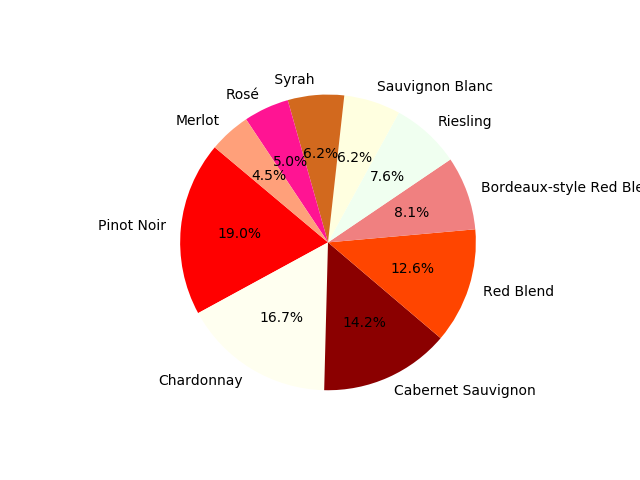

In [311]:
plt.pie(bottles, labels=labels, autopct="%1.1f%%", startangle = 140, colors=colors)
plt.show()
plt.savefig("Varities of wine")